In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats     # metryki statystyczne (pakiet zawiera więcej metryk dla regresji liniowej niż sklearn)
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as ssp
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_csv('spr_polskie.csv')

In [3]:
df = df.drop(columns = ['Unnamed: 0', 'private_offer'])

In [4]:
df.head()

,liczba_pokoi,pietro,rok_budowy,szerokosc_geograficzna,dlugosc_geograficzna,wojewodztwo,miasto,cena,powierzchnia,cena_m2
0,3,0,2019.0,67.740290,56.945660,pomorskie,Gdansk,219254.0,672.000000,19254.0
1,3,0,1997.0,138.671200,293.206000,pomorskie,Gdansk,28375.0,3.388060,8375.0
2,3,1,2012.0,134.600000,266.650000,pomorskie,Gdansk,28560.0,3.336449,8560.0
3,1,2,1974.0,52.282204,20.976530,mazowieckie,Warszawa,318999.0,32.000000,9969.0
4,3,3,1990.0,52.263159,20.920753,mazowieckie,Warszawa,600000.0,62.000000,9677.0


In [14]:
pom = df.where(df.wojewodztwo == 'pomorskie').dropna()
pom

,liczba_pokoi,pietro,rok_budowy,szerokosc_geograficzna,dlugosc_geograficzna,wojewodztwo,miasto,cena,powierzchnia,cena_m2
0,3.0,0.0,2019.0,67.74029,56.94566,pomorskie,Gdansk,219254.0,672.000000,19254.0
1,3.0,0.0,1997.0,138.67120,293.20600,pomorskie,Gdansk,28375.0,3.388060,8375.0
2,3.0,1.0,2012.0,134.60000,266.65000,pomorskie,Gdansk,28560.0,3.336449,8560.0
6,4.0,0.0,2021.0,48.84000,439.42000,pomorskie,Pruszcz Gdanski,26264.0,4.192848,6264.0
7,1.0,1.0,2020.0,117.08000,159.10000,pomorskie,Gdansk,212800.0,16.625000,12800.0
...,...,...,...,...,...,...,...,...,...,...
49702,1.0,2.0,1959.0,31.89000,200.63810,pomorskie,Gdansk,250.0,332.000000,50.0
49703,2.0,0.0,1980.0,15.15000,197.70000,pomorskie,Gdansk,230.0,502.000000,30.0
49704,2.0,2.0,2018.0,126.11900,123.37770,pomorskie,Gdansk,258.0,402.000000,58.0
49705,2.0,2.0,2019.0,35.10000,89.65000,pomorskie,Gdansk,245.0,402.000000,45.0


nic bardziej kreatywnego niestety nie przyszło mi do głowy...  
Pierwszy boxplot to rozkład liczby pokoi w poszczegolnych wojewodztwach a drugi to w wojewodztwie pomorskim. Stworzyłam osobny df na woj. pomorskie. można by to zrobić w wedgecie, spróbuje jeszcze nad tym popracować jutro do naszego spotkania...

Text(0.5, 1.0, 'Rozkład kolumny: liczba pokoi z podziałem na wojewodztwa')

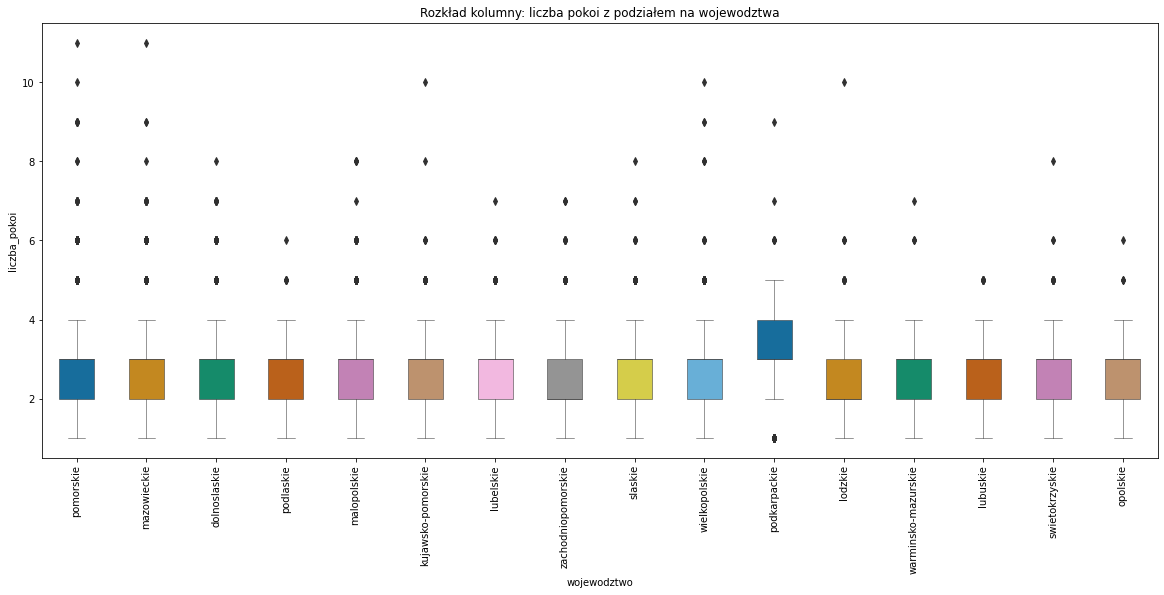

In [18]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,8))
bplot = sns.boxplot(y='liczba_pokoi', x='wojewodztwo', 
                 data=df, 
                 width=0.5,
                 palette="colorblind", 
                 orient = 'v',
                 linewidth= 0.5)
plt.xticks(rotation = 90, size = 10)

plt.title('Rozkład kolumny: liczba pokoi z podziałem na wojewodztwa')

Text(0.5, 1.0, 'Rozkład kolumny: .......... z podziałem na wojewodztwa')

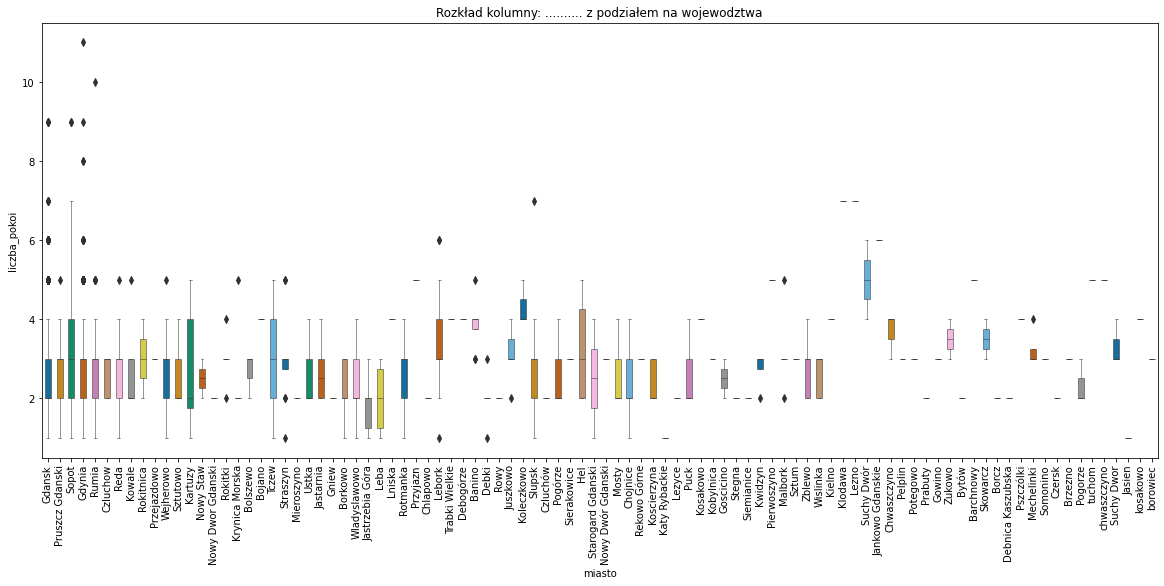

In [15]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,8))
bplot = sns.boxplot(y='liczba_pokoi', x='miasto', 
                 data=pom, 
                 width=0.5,
                 palette="colorblind", 
                 orient = 'v',
                 linewidth= 0.5)
plt.xticks(rotation = 90, size = 10)

plt.title('Rozkład kolumny: liczba pokoi z podziałem na miasta w województwie pomorskim')